This was used as an illustration of matrix techniques in computer graphics for a matrix methods course for engineers. There is a hard-coding of a picture of Swoop the Eagle and then various manipulations and plots, including a video of Swoop doing a backflip!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

[[ 2.    3.    5.    3.    2.5   2.    0.    2.    2.    3.    3.    2.
   2.    7.5   7.5   8.5  10.5   8.5   8.    7.5   5.5   7.5   8.5   8.5
   2.    2.   -4.    0.   -4.    0.   -4.    2.    2.    3.5   7.    7.75
   6.75  6.75  7.75  7.75  8.5   8.5  10.5   7.5   7.5   7.5  10.5   8.5
   8.5  14.5  10.5  14.5  10.5  14.5  10.5   8.5   8.5 ]
 [ 4.    4.    0.    2.    0.    2.    0.    4.   14.   14.    4.    4.
  14.   14.    4.    4.    0.    2.    0.    2.    0.    4.    4.   14.
  14.   16.   10.   16.   12.   18.   14.   23.   28.   30.   30.   29.
  29.   28.   28.   29.   28.   26.   25.   25.   25.5  25.   25.   24.
  23.   14.   18.   12.   16.   10.   14.   16.   14.  ]]


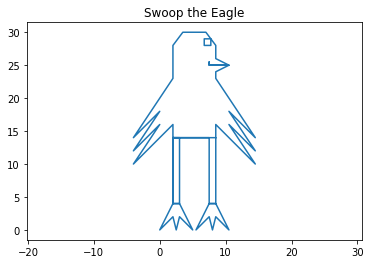

In [2]:
swoop = np.array([[0,0], [1,0], [3,-4], [1,-2], [.5,-4], [0,-2], [-2,-4], [0,0],
                     [0,10], [1,10], [1,0], [0,0], [0,10],
                      [5.5,10], [5.5,0], [6.5,0], [8.5,-4], [6.5,-2], [6,-4], [5.5,-2], [3.5,-4], [5.5,0],
                      [6.5,0], [6.5,10], [0,10],
                      [0,12], [-6,6], [-2,12], [-6,8], [-2,14], [-6,10], [0,19], [0,24], 
                      [1.5,26], [5,26], 
                      [5.75,25], [4.75,25], [4.75,24], [5.75,24], [5.75,25],
                      [6.5,24], [6.5,22], [8.5,21], [5.5,21], [5.5,21.5], [5.5,21], [8.5,21], [6.5,20],
                      [6.5,19], [12.5,10], [8.5,14], [12.5,8], [8.5,12], [12.5,6], [8.5,10], [6.5,12], [6.5,10]
                     ]).T

#Reset swoop so that the origin is the tip of the leftmost talon:
swoop = swoop + np.array([[2],[4]])

#Centered Swoop with the origin at the center of his body:
swoop_centered = swoop + np.array([[-5], [-20]])

#Centered Swoop in homogeneous coordinates:
swoop_homog = np.append(swoop_centered, [np.full(swoop.shape[1], 1)], axis=0)

plt.plot(swoop[0], swoop[1]);
plt.axis('equal');
plt.title('Swoop the Eagle');

print(swoop)

In [3]:
#A function that applies a 2d transformation to data and plots the before and after result:
def mp_transform2d(transformation, data):
    transformed_data = np.matmul(transformation, data)
    print('Transformation by ')
    print(np.matrix.view(transformation))
    plt.plot(data[0], data[1], alpha=0.3, label='original');
    plt.plot(transformed_data[0], transformed_data[1], label='transformed');
    plt.legend();
    plt.axis('equal');

Transformation by 
[[1 1]
 [0 1]]


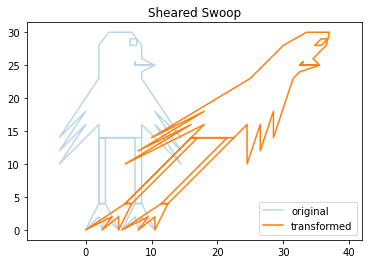

In [4]:
#Plots the result of applying a shear transformation to Swoop:
transformation = np.array([[1, 1], [0,1]])
mp_transform2d(transformation, swoop)
plt.title('Sheared Swoop');

In [5]:
#A function that returns a 2d matrix implementing rotation by theta radians:
def rotation_matrix(theta):
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

Transformation by 
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


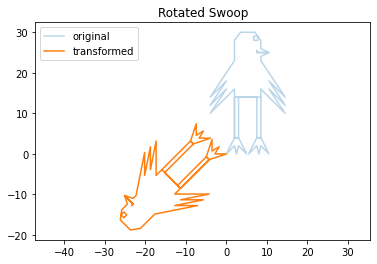

In [6]:
#Plots the result of applying a rotation transformation by 3pi/4 radians to Swoop:
transformation = rotation_matrix(3*np.pi / 4)
mp_transform2d(transformation, swoop)
plt.title('Rotated Swoop');

In [7]:
#A function that implements homogeneous coordinates and matrix multiplication to shift data by (h,k) and plots the result:
def shift(h, k, data):
    homog_data = np.append(swoop, [np.full(data.shape[1], 1)], axis=0)
    shift_matrix = np.array([[1, 0, h], [0, 1, k], [0, 0, 1]])
    transformed_data = np.matmul(shift_matrix, homog_data)
    print(r'Shift by (' + str(h) + ', ' + str(k) + ')')
    plt.plot(data[0], data[1], alpha=0.3, label='original');
    plt.plot(transformed_data[0], transformed_data[1], label='shifted');
    plt.legend()
    plt.axis('equal');

Shift by (15, -5)


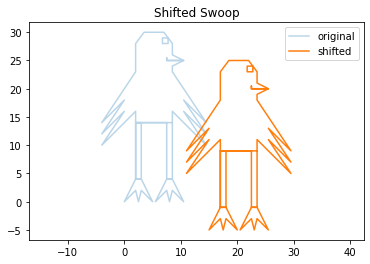

In [8]:
#Plots the result of shifting Swoop by (15,-5):
shift(15, -5, swoop)
plt.title('Shifted Swoop');

In [9]:
from matplotlib import animation, rc
from IPython.display import HTML

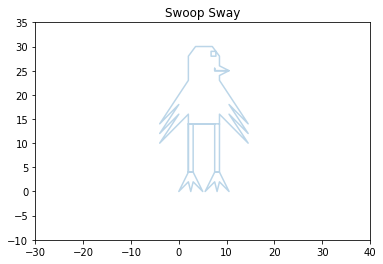

In [10]:
#Initializes Swoop Sway video:

fig, ax = plt.subplots()

ax.set_xlim(-30,40)
ax.set_ylim(-10,35)

line, = ax.plot([], [], lw=2)
ax.plot(swoop[0], swoop[1], alpha=0.3, color='tab:blue');
plt.title('Swoop Sway');

In [11]:
#Creates a video of Swoop swaying by applying a loop of shear transformations to the original data:

def swoop_sway(frame_num):
    transformation = np.array([[1,np.sin(2*np.pi*frame_num/100)], [0,1]])
    transformed_swoop = np.matmul(transformation, swoop)
    line.set_data((transformed_swoop[0], transformed_swoop[1]))
    return (line,)

anim = animation.FuncAnimation(fig, swoop_sway, frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())

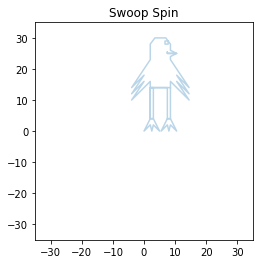

In [12]:
#Initializes a Swoop Spin video:

fig2, ax2 = plt.subplots()

ax2.set_xlim(-35,35)
ax2.set_ylim(-35,35)
ax2.set_aspect('equal')

line, = ax2.plot([], [], lw=2)
ax2.plot(swoop[0], swoop[1], alpha=0.3, color='tab:blue');
plt.title('Swoop Spin');

In [13]:
#Creates a video of Swoop spinning by applying a loop of rotations transformations to the original data:

def swoop_spin(frame_num):
    transformation = rotation_matrix(2*np.pi*frame_num/100)
    transformed_swoop = np.matmul(transformation, swoop)
    line.set_data((transformed_swoop[0], transformed_swoop[1]))
    return (line,)

anim = animation.FuncAnimation(fig2, swoop_spin, frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())

In [14]:
def homogenize2dmat(matrix):
    return [[*matrix[0], 0], [*matrix[1], 0], [0, 0, 1]]

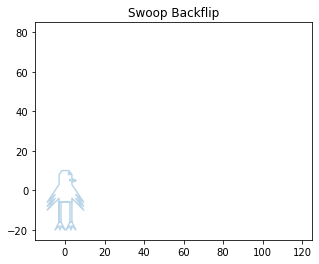

In [15]:
#Initializes a Swoop Backflip video:

fig3, ax3 = plt.subplots()

ax3.set_xlim(-15,125)
ax3.set_ylim(-25,85)
ax3.set_aspect('equal')

line, = ax3.plot([], [], lw=2)
ax3.plot(swoop_centered[0], swoop_centered[1], alpha=0.3, color='tab:blue');

plt.title('Swoop Backflip');

In [16]:
#Creates a video of Swoop doing a backflip by applying a loop of composite translation and rotation transformations.

def swoop_backflip(frame_num):
    rotation = homogenize2dmat(rotation_matrix(2*np.pi*frame_num/100))
    shift = np.array([[1, 0, frame_num], [0, 1, 60*np.sin(np.pi*frame_num/100)], [0, 0, 1]])
    transformed_swoop = np.matmul(shift, np.matmul(rotation, swoop_homog))
    line.set_data((transformed_swoop[0], transformed_swoop[1]))
    return (line,)

anim = animation.FuncAnimation(fig3, swoop_backflip, frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())

The following two graphs give examples of linear transformations that scale the size of Swoop. These were used as an illustration in a discussion of the geometric interpretation of the absolute value of the determinant of a matrix as a scaling factor.

Transformation by 
[[2 4]
 [0 3]]


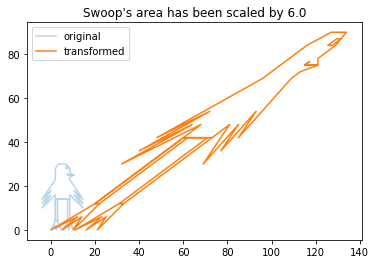

In [17]:
transformation = np.array([[2, 4], [0,3]])
mp_transform2d(transformation, swoop)
plt.title('Swoop\'s area has been scaled by ' + str(np.linalg.det(transformation)));

Transformation by 
[[ 0.5  0.3]
 [-0.2 -0.5]]


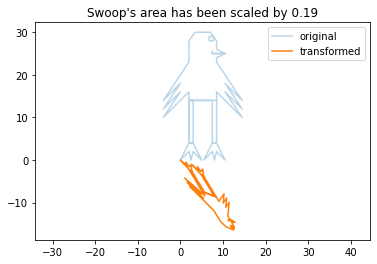

In [18]:
transformation = np.array([[.5, .3], [-.2,-.5]])
mp_transform2d(transformation, swoop)
plt.title('Swoop\'s area has been scaled by ' + str(abs(np.linalg.det(transformation))));